<a href="https://colab.research.google.com/github/AntonyMorales27/ClasificacionNotasEstudiantes/blob/master/AceptacionNotasEstudiantess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CLASIFICACION DE NOTAS DE ESTUDIANTES DEL CURSO DE SEMINARIO DE TECNOLOGIAS DE LA INFORMACION 

**ESTUARDO ANTONY MORALES FELIPE  1690-17-4761**

In [1]:
!git clone https://github.com/AntonyMorales27/ClasificacionNotasEstudiantes.git


Cloning into 'ClasificacionNotasEstudiantes'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 16 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), done.


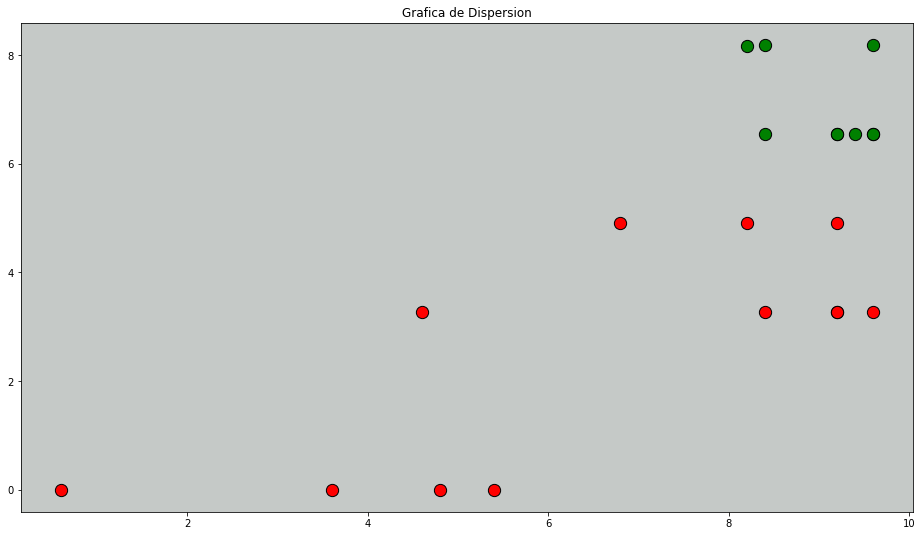

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('fast')
ax = plt.gca()
ax.set_facecolor('xkcd:silver')

#Plotear y clasificar los puntos
def plot_points(X, y):
    aceptados = X[np.argwhere(y==1)]
    negados = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in negados], [s[0][1] for s in negados], s = 150, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in aceptados], [s[0][1] for s in aceptados], s = 150, color = 'green', edgecolor = 'k')

#Líneas de Entrenamiento
def display(m, b, color='y--'):
    plt.xlim(-0.5,10)
    plt.ylim(-0.5,10)
    x = np.arange(-10, 10, 0.15)
    plt.plot(x, m*x+b, color)

#Archivo de datos
df = pd.read_csv('/content/ClasificacionNotasEstudiantes/DatosParaComprobar.csv',header=None,names=['EjeX','EjeY', 'Tipo'])

#Creación de arreglos
X = np.array(df[['EjeX','EjeY']])
y = np.array(df['Tipo'])
plot_points(X,y) #Plotear los puntos con las coordenadas
plt.title("Grafica de Dispersion") #Título de la gráfica
plt.show() #Mostrar puntos


In [11]:
import numpy as np
np.random.seed(57)
def stepFunction(t):
    if t >= 0:
        return 1
    return 0
def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])
def perceptronStep(X, y, W, b, learn_rate = 0.8):
    # Fill in code
    for i in range(len(X)):
        result_y=prediction(X[i], W, b)
        if y[i]-result_y==1:
            W[0]+=X[i][0]*learn_rate
            W[1]+=X[i][1]*learn_rate
            b+=learn_rate
        if y[i]-result_y==-1:
            W[0]-=X[i][0]*learn_rate
            W[1]-=X[i][1]*learn_rate
            b-=learn_rate
    return W, b
def trainPerceptronAlgorithm(X, y, learn_rate = 0.2, num_epochs = 100):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
   
    boundary_lines = []
    for i in range(num_epochs):

        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
        '''
        Solo para las impresiones de las lineas
        '''
        if i % (num_epochs / 40) == 0:
            display(-W[0]/W[1], -b/W[1])
            
    # Ploteando la solución límite
    plt.title("Grafica de Clasificacion")
    #display(-W[0]/W[1], -b/W[1], 'black')
    display(-W[0]/W[1], -b/W[1], 'black')  #Línea divisora
    
    # Ploteando los datos con sus coordenadas
    plot_points(X, y)
    plt.show()
    
    return boundary_lines

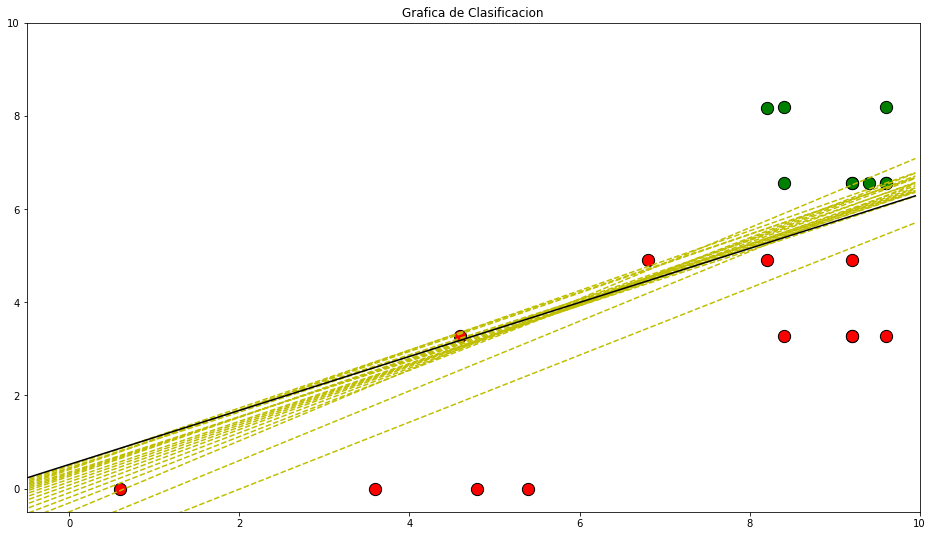

[(array([0.16040665]), array([-4.28071826])),
 (array([0.59956733]), array([-3.08459013])),
 (array([1.00495832]), array([-2.87252995])),
 (array([0.33826957]), array([-1.65981541])),
 (array([0.68273881]), array([-1.64672787])),
 (array([0.71890422]), array([-1.45142207])),
 (array([0.8096573]), array([-1.36804809])),
 (array([0.40892826]), array([-1.04338595])),
 (array([0.51942768]), array([-0.97796851])),
 (array([0.67222159]), array([-0.96402081])),
 (array([0.74755989]), array([-0.89499039])),
 (array([0.41385659]), array([-0.70237258])),
 (array([0.53942318]), array([-0.67725293])),
 (array([0.63323763]), array([-0.61832101])),
 (array([0.69763909]), array([-0.55942369])),
 (array([0.76200276]), array([-0.50056094])),
 (array([0.45193634]), array([-0.41974659])),
 (array([0.56312586]), array([-0.38600986])),
 (array([0.62962701]), array([-0.36027803])),
 (array([0.67046777]), array([-0.33455939])),
 (array([0.7112876]), array([-0.30885392])),
 (array([0.44225042]), array([-0.264

In [12]:
trainPerceptronAlgorithm(X,y)